## Prepare the data

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd 
import json 

data = pd.read_csv('../data/codebooks/collusion-semantic-seg-llama31-70b-tags-llama31-70b-codebook.csv')
tag_embeddings = {}

for ind,row in data.iterrows():
    tag_embeddings[row['tag']] = json.loads(row['embeddings'])

# Convert dictionary to an array of embeddings
embeddings = np.array(list(tag_embeddings.values()))
# print(len(embeddings[0]))
data.head()


,Unnamed: 0,tag,description,embeddings
0,0,exam marking discussion,"""A conversation about the process and methods ...","[0.32319629192352295, -0.17829398810863495, -0..."
1,1,professional interview tone,"""A formal and polished conversation between tw...","[0.3332962691783905, -0.046114273369312286, 0...."
2,2,neutral job candidate,"""A discussion where one participant's response...","[0.1742410808801651, -0.060671158134937286, -0..."
3,3,formal conversation,"""A polite and professional discussion between ...","[0.4877059757709503, 0.031197376549243927, -0...."
4,4,academic discussion,"""A serious and informative conversation betwee...","[0.3865499794483185, -0.04310765117406845, -0...."


# Compute ideal dimensional reduction - looking for score of 90-95% meaning that much variation has been explained

PCA components: 10, Cumulative explained variance: 0.5030
PCA components: 20, Cumulative explained variance: 0.6567
PCA components: 50, Cumulative explained variance: 0.8354
PCA components: 100, Cumulative explained variance: 0.9333
PCA components: 200, Cumulative explained variance: 0.9866
PCA components: 300, Cumulative explained variance: 0.9984


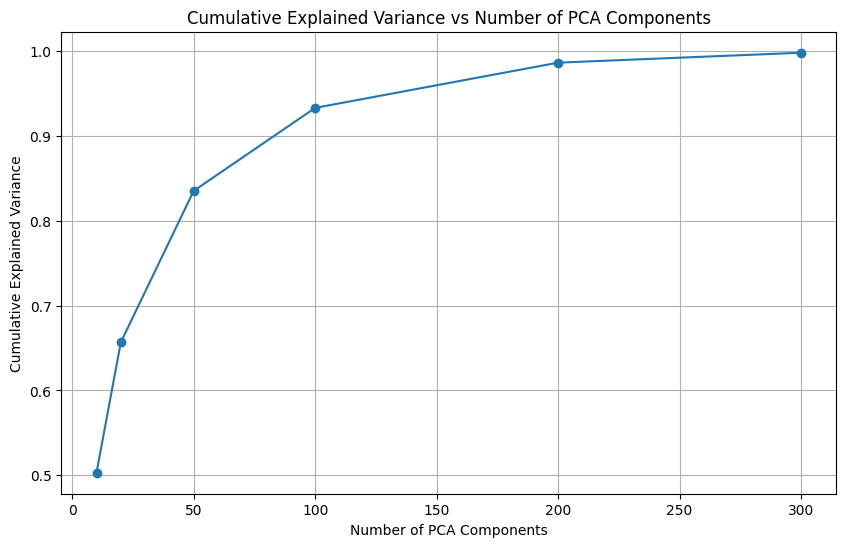

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a range of PCA components to test
pca_components = [10, 20, 50, 100, 200, 300]  # Adjust as needed for your dataset

# Dictionary to store cumulative explained variance for each component count
explained_variances = {}

# Loop over each number of components
for n_components in pca_components:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    pca.fit(embeddings)  # 'embeddings' should be your dataset of vectors

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)[-1]  # Total explained variance for n_components
    explained_variances[n_components] = cumulative_variance
    print(f"PCA components: {n_components}, Cumulative explained variance: {cumulative_variance:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(list(explained_variances.keys()), list(explained_variances.values()), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of PCA Components')
plt.grid(True)
plt.show()


In [12]:
pca_dimensions = [100] # pca dimnesions


# pca_dimensions = [100] # pca dimnesions


In [14]:
from sklearn import preprocessing
from sklearn.cluster import KMeans


# Experiment parameters
cluster_range = range(2,100)        # Range of k values for clustering

# Dictionary to store results
results = {}


# Apply PCA to reduce dimensions
pca = PCA(n_components=dim)
reduced_embeddings = pca.fit_transform(embeddings)
normed_embeddings = preprocessing.normalize(reduced_embeddings)

for dim in pca_dimensions:
    print(f"Doing PCA of {dim} embeddings d is {len(embeddings[0])}")
    # Dictionary to store Davies-Bouldin scores for each k in the current PCA dimension
    results[dim] = {}
    
    # Loop over each number of clusters (k)
    for k in cluster_range:
        # Apply KMeans clustering
        # kmeans = KMeans(n_clusters=k, random_state=0)
        # cluster_labels = kmeans.fit_predict(reduced_embeddings)
    
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(normed_embeddings)
        
        # Calculate Davies-Bouldin Index
        db_index = davies_bouldin_score(reduced_embeddings, cluster_labels)
        results[dim][k] = db_index
        print(f"PCA Dim: {dim}, Clusters: {k}, Davies-Bouldin Index: {db_index:.3f}")




Doing PCA of 100 embeddings d is 1024
PCA Dim: 100, Clusters: 2, Davies-Bouldin Index: 2.882
PCA Dim: 100, Clusters: 3, Davies-Bouldin Index: 2.662
PCA Dim: 100, Clusters: 4, Davies-Bouldin Index: 2.992
PCA Dim: 100, Clusters: 5, Davies-Bouldin Index: 2.866
PCA Dim: 100, Clusters: 6, Davies-Bouldin Index: 2.864
PCA Dim: 100, Clusters: 7, Davies-Bouldin Index: 2.862
PCA Dim: 100, Clusters: 8, Davies-Bouldin Index: 2.843
PCA Dim: 100, Clusters: 9, Davies-Bouldin Index: 2.748
PCA Dim: 100, Clusters: 10, Davies-Bouldin Index: 2.832
PCA Dim: 100, Clusters: 11, Davies-Bouldin Index: 2.750
PCA Dim: 100, Clusters: 12, Davies-Bouldin Index: 2.736
PCA Dim: 100, Clusters: 13, Davies-Bouldin Index: 2.655
PCA Dim: 100, Clusters: 14, Davies-Bouldin Index: 2.605
PCA Dim: 100, Clusters: 15, Davies-Bouldin Index: 2.531
PCA Dim: 100, Clusters: 16, Davies-Bouldin Index: 2.498
PCA Dim: 100, Clusters: 17, Davies-Bouldin Index: 2.560
PCA Dim: 100, Clusters: 18, Davies-Bouldin Index: 2.548
PCA Dim: 100, Clus

# compute silhouette and davies bouldin scores for different k

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np

# Experiment parameters
dim = 200
cluster_range = range(2, 100)        # Range of k values for clustering

# Dictionary to store results
results = {}

# Loop over each PCA dimension
for dim in pca_dimensions:
    # Apply PCA to reduce dimensions
    print(f"Doing PCA of {dim} embeddings where initial dimension is {len(embeddings[0])}")
    pca = PCA(n_components=dim)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Dictionary to store Davies-Bouldin and Silhouette scores for each k
    results[dim] = {'davies_bouldin': {}, 'silhouette': {}}

    # Loop over each number of clusters (k)
    for k in cluster_range:
        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=k, random_state=0)
        cluster_labels = kmeans.fit_predict(reduced_embeddings)

        # Calculate Davies-Bouldin Index
        db_index = davies_bouldin_score(reduced_embeddings, cluster_labels)
        results[dim]['davies_bouldin'][k] = db_index
        
        # Calculate Silhouette Score (only if k > 1)
        if k > 1:
            silhouette_avg = silhouette_score(reduced_embeddings, cluster_labels)
            results[dim]['silhouette'][k] = silhouette_avg
        else:
            results[dim]['silhouette'][k] = None  # No Silhouette Score for k=1

        print(f"PCA Dim: {dim}, Clusters: {k}, DB Index: {db_index:.3f}, Silhouette Score: {silhouette_avg:.3f}" if k > 1 else f"PCA Dim: {dim}, Clusters: {k}, DB Index: {db_index:.3f}")

# Results dictionary now contains both Davies-Bouldin and Silhouette scores for each PCA dimension and cluster count


Doing PCA of 100 embeddings where initial dimension is 1024
PCA Dim: 100, Clusters: 2, DB Index: 2.075, Silhouette Score: 0.152
PCA Dim: 100, Clusters: 3, DB Index: 2.661, Silhouette Score: 0.091
PCA Dim: 100, Clusters: 4, DB Index: 2.791, Silhouette Score: 0.081
PCA Dim: 100, Clusters: 5, DB Index: 2.892, Silhouette Score: 0.078
PCA Dim: 100, Clusters: 6, DB Index: 2.704, Silhouette Score: 0.082
PCA Dim: 100, Clusters: 7, DB Index: 2.622, Silhouette Score: 0.090
PCA Dim: 100, Clusters: 8, DB Index: 2.756, Silhouette Score: 0.082
PCA Dim: 100, Clusters: 9, DB Index: 2.622, Silhouette Score: 0.082
PCA Dim: 100, Clusters: 10, DB Index: 2.547, Silhouette Score: 0.085
PCA Dim: 100, Clusters: 11, DB Index: 2.650, Silhouette Score: 0.082
PCA Dim: 100, Clusters: 12, DB Index: 2.547, Silhouette Score: 0.080
PCA Dim: 100, Clusters: 13, DB Index: 2.533, Silhouette Score: 0.074
PCA Dim: 100, Clusters: 14, DB Index: 2.553, Silhouette Score: 0.074
PCA Dim: 100, Clusters: 15, DB Index: 2.554, Silhou

# Plot scores : want low DB and high sihlouette (close to 1 is good here)

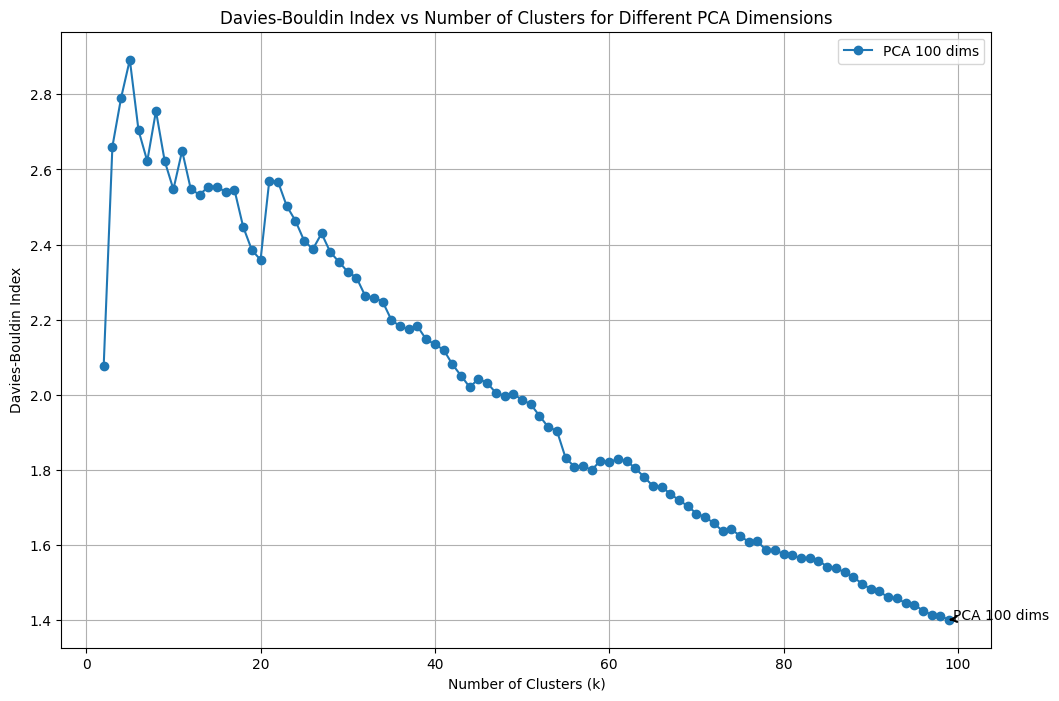

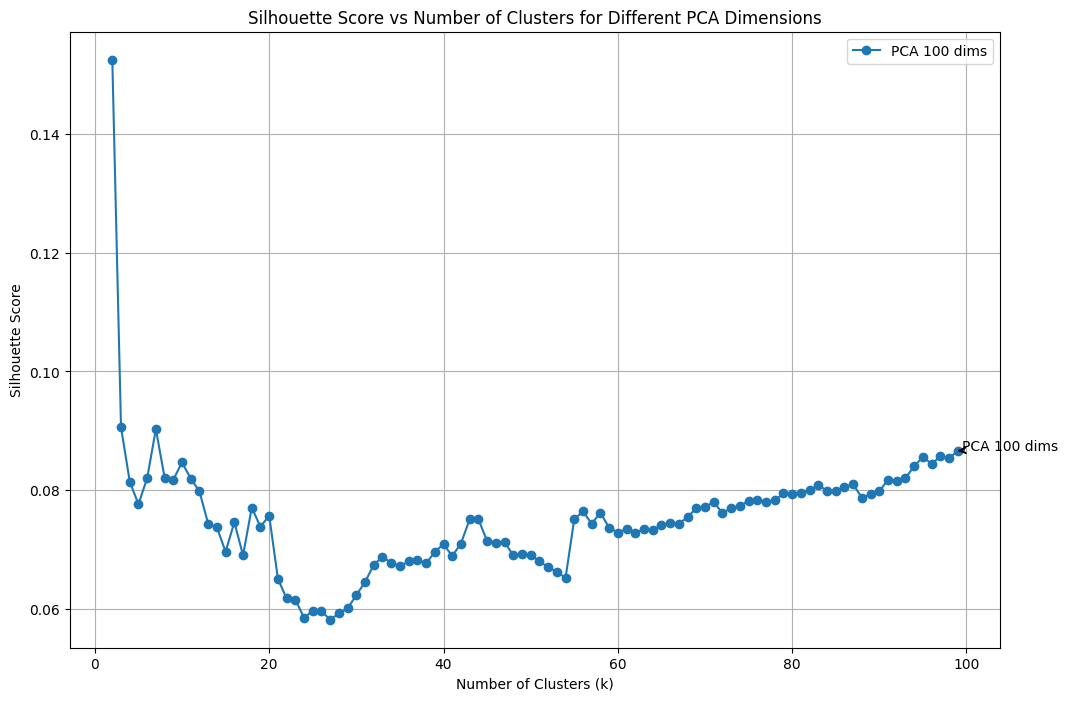

In [16]:
import matplotlib.pyplot as plt

# Plot Davies-Bouldin Index
plt.figure(figsize=(12, 8))
for dim in pca_dimensions:
    x_values = list(results[dim]['davies_bouldin'].keys())
    y_values = list(results[dim]['davies_bouldin'].values())
    
    # Plot the Davies-Bouldin Index for each dimension
    plt.plot(x_values, y_values, marker='o', label=f'PCA {dim} dims')
    
    # Add labels with arrows pointing to the last point in each line
    plt.annotate(f'PCA {dim} dims',
                 xy=(x_values[-1], y_values[-1]),               # Last point coordinates
                 xytext=(x_values[-1] + 0.5, y_values[-1]),     # Offset the text slightly
                 arrowprops=dict(arrowstyle="->", lw=1.5))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters for Different PCA Dimensions')
plt.legend()
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(12, 8))
for dim in pca_dimensions:
    x_values = list(results[dim]['silhouette'].keys())
    y_values = [score for score in results[dim]['silhouette'].values() if score is not None]  # Ignore None values

    # Plot the Silhouette Score for each dimension
    plt.plot(x_values, y_values, marker='o', label=f'PCA {dim} dims')
    
    # Add labels with arrows pointing to the last point in each line
    if y_values:  # Check if y_values list is not empty
        plt.annotate(f'PCA {dim} dims',
                     xy=(x_values[-1], y_values[-1]),           # Last point coordinates
                     xytext=(x_values[-1] + 0.5, y_values[-1]), # Offset the text slightly
                     arrowprops=dict(arrowstyle="->", lw=1.5))

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters for Different PCA Dimensions')
plt.legend()
plt.grid(True)
plt.show()
